# Query about calib collections

- work with Weakly_2023_01
- use jupyter kernel LSST
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/03/28

https://pipelines.lsst.io/middleware/faq.html

In [7]:
import os
import matplotlib.pyplot as plt
import re

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.io import fits
from astropy.time import Time

In [2]:
# LSST Display
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')

In [25]:
# Butler
import lsst.daf.butler as dafButler
from lsst.daf.butler import CollectionType
#from lsst.daf.butler import CollectionTypes

In [5]:
#repo = "/sdf/group/rubin/repo/main" # repo/main
repo="/sdf/group/rubin/repo/oga/"  # /repo/embargo
butler = dafButler.Butler(repo)
registry = butler.registry

# Registry

- Examine the info from registry

In [12]:
butler.registry.dimensions.getDatabaseElements()

NamedValueSet({DatabaseDimension(band), DatabaseDimension(detector), DatabaseDimension(physical_filter), DatabaseDimension(subfilter), DatabaseDimension(tract), DatabaseDimension(visit_system), DatabaseDimension(exposure), DatabaseDimension(patch), DatabaseDimension(visit), DatabaseDimensionCombination(visit_definition), DatabaseDimensionCombination(visit_detector_region), DatabaseDimensionCombination(visit_system_membership)})

In [17]:
print(butler.registry.dimensions["exposure"].RecordClass.fields)

exposure: 
  instrument: str
  id: int
  physical_filter: str
  obs_id: str
  exposure_time: float
  dark_time: float
  observation_type: str
  observation_reason: str
  day_obs: int
  seq_num: int
  seq_start: int
  seq_end: int
  group_name: str
  group_id: int
  target_name: str
  science_program: str
  tracking_ra: float
  tracking_dec: float
  sky_angle: float
  azimuth: float
  zenith_angle: float
  has_simulated: bool
  timespan: lsst.daf.butler.Timespan


In [19]:
print(butler.registry.dimensions["visit"].RecordClass.fields)

visit: 
  instrument: str
  id: int
  physical_filter: str
  name: str
  day_obs: int
  seq_num: int
  exposure_time: float
  target_name: str
  observation_reason: str
  science_program: str
  azimuth: float
  zenith_angle: float
  region: lsst.sphgeom.Region
  timespan: lsst.daf.butler.Timespan


In [18]:
print(butler.registry.dimensions["physical_filter"].RecordClass.fields)

physical_filter: 
  instrument: str
  name: str
  band: str


In [20]:
print(butler.registry.dimensions["tract"].RecordClass.fields)

tract: 
  skymap: str
  id: int
  region: lsst.sphgeom.Region


## Collection


In the following cell one get the list of flats available

In [31]:
CollectionType.CALIBRATION

<CollectionType.CALIBRATION: 4>

In [30]:
#expanded = list(
#    butler.registry.queryCollections(
#        repo,
#        flattenChains=True,
#        collectionTypes=(CollectionType.all - {CollectionType.CALIBRATION}),
#    )
#)

In [26]:
run_collections = list(
    butler.registry.queryCollections(
        re.compile("LATISS/calib/.+"),
        collectionTypes={CollectionType.RUN},
    )
)

In [27]:
run_collections

['LATISS/calib/DM-28636/curated/19700101T000000Z',
 'LATISS/calib/DM-28636/curated/20180101T000000Z',
 'LATISS/calib/DM-28636/unbounded',
 'LATISS/calib/DM-36484/biasGen.20221005a/20221006T000101Z',
 'LATISS/calib/DM-36484/verifyBias.20221005a/20221006T000747Z',
 'LATISS/calib/DM-36484/verifyBias.20221005a/20221006T213237Z',
 'LATISS/calib/DM-36484/darkGen.20221005a/20221006T222501Z',
 'LATISS/calib/DM-36484/darkGen.20221006a/20221006T222921Z',
 'LATISS/calib/DM-36484/verifyDark.20221006a/20221006T224403Z',
 'LATISS/calib/DM-36484/flatGen-SDSSr.20221006a/20221006T233657Z',
 'LATISS/calib/DM-36484/verifyFlat-SDSSr.20221006a/20221006T234341Z',
 'LATISS/calib/DM-36484/flatGen-SDSSg.20221006a/20221007T002703Z',
 'LATISS/calib/DM-36484/verifyFlat-SDSSg.20221006a/20221007T003418Z',
 'LATISS/calib/DM-36484/flatGen-SDSSi.20221006a/20221007T003732Z',
 'LATISS/calib/DM-36484/verifyFlat-SDSSi.20221006a/20221007T004423Z',
 'LATISS/calib/DM-36484/flatGen-SDSSiD.20221006a/20221007T004708Z',
 'LATISS

In [35]:
# Of couse I know which exposure I am using
exposure_selected=2023021400335

In [36]:
flat_img = butler.get(
    "flat",
    instrument="LATISS", exposure=exposure_selected, detector=0,
    collections="LATISS/calib"
)

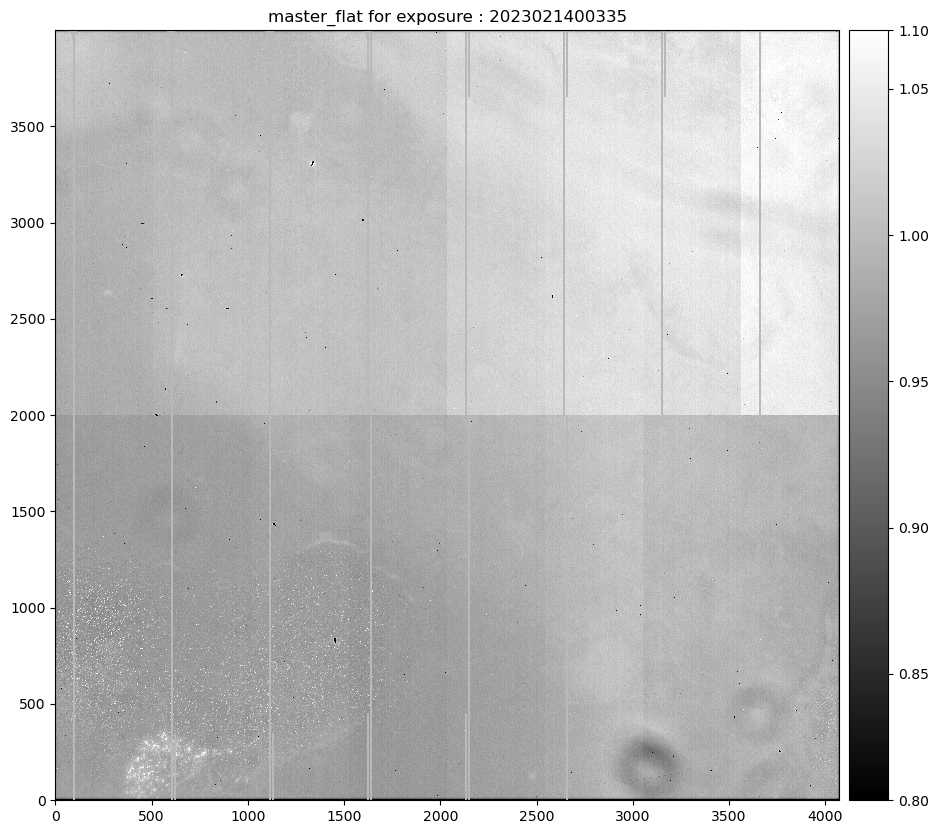

In [38]:

fig = plt.figure(figsize=(12,10))
afw_display = afwDisplay.Display(frame=fig)
afw_display.scale('linear', 'zscale',None)
title = f"master_flat for exposure : {exposure_selected}"
afw_display.mtv(flat_img.image,title=title)

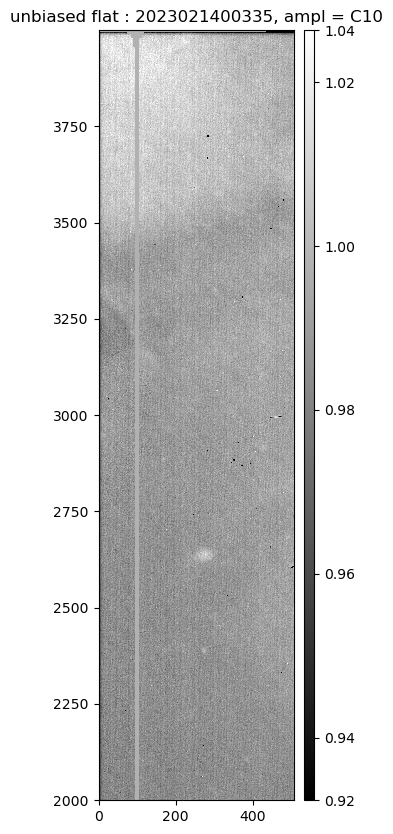

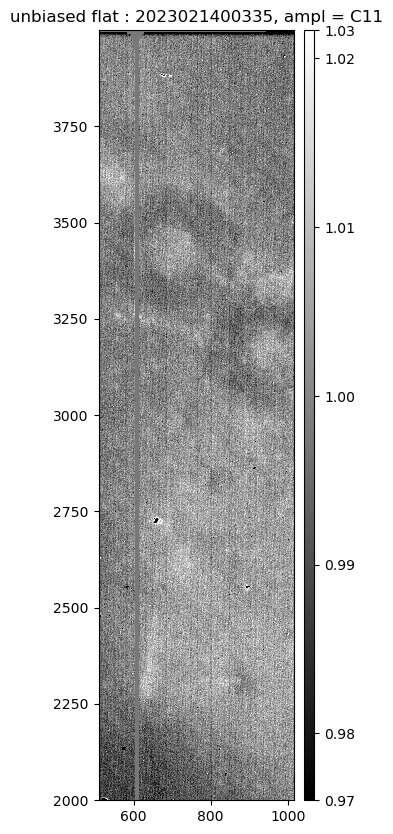

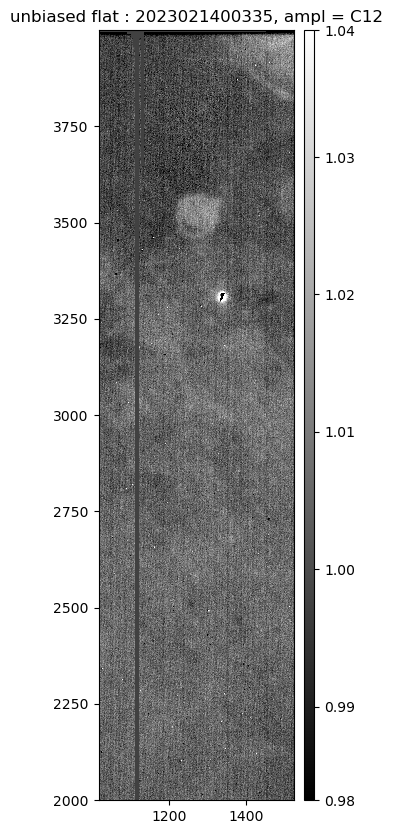

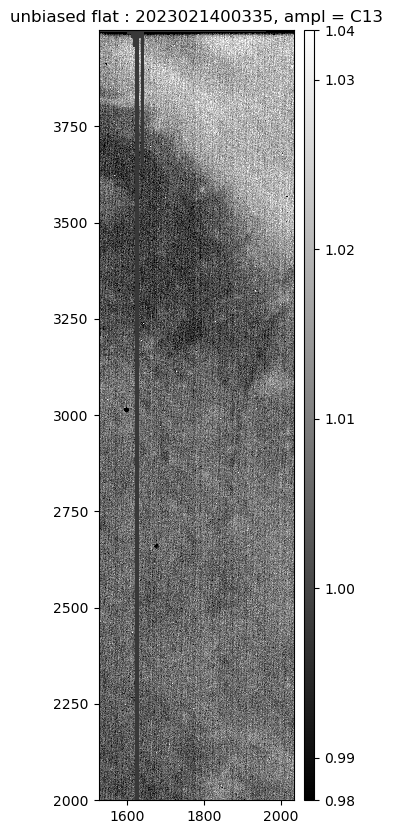

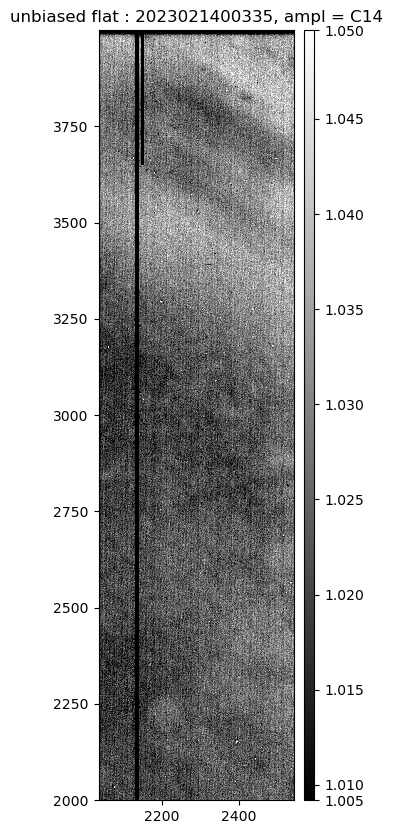

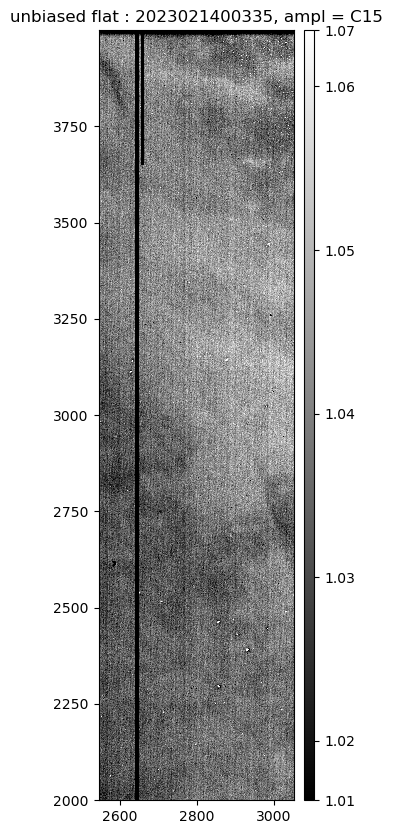

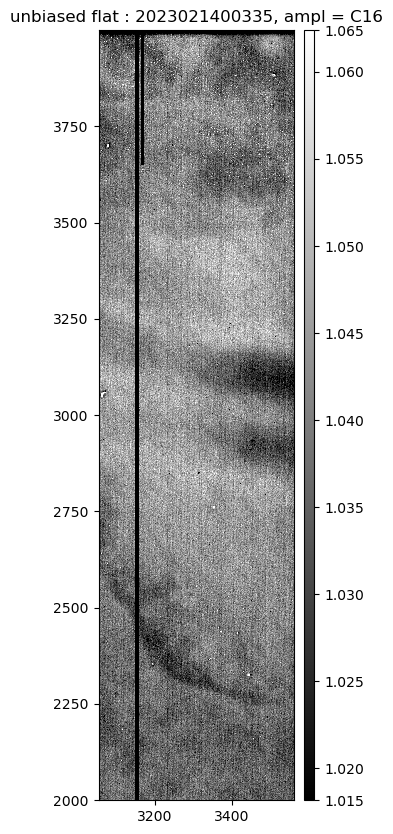

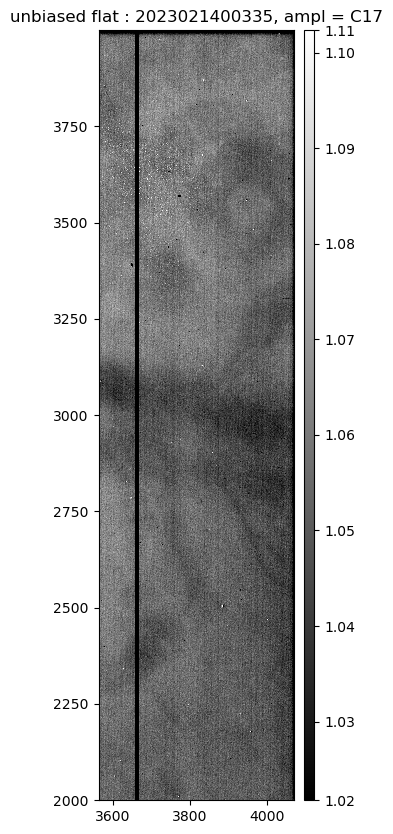

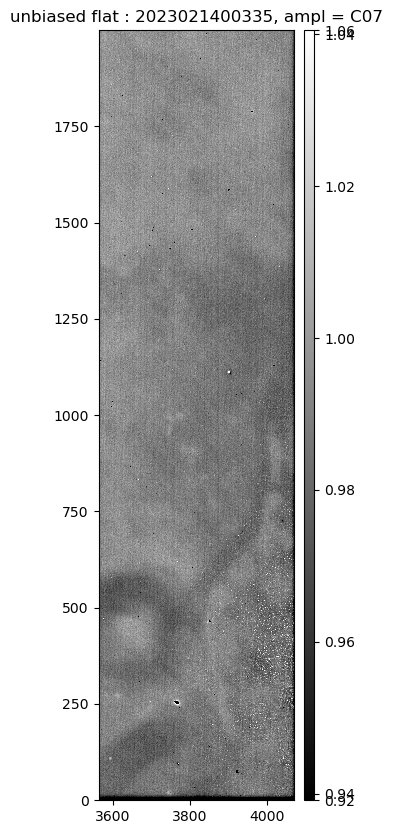

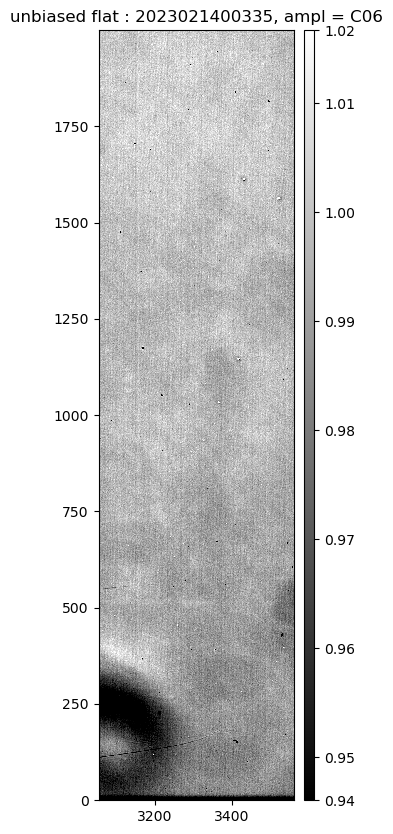

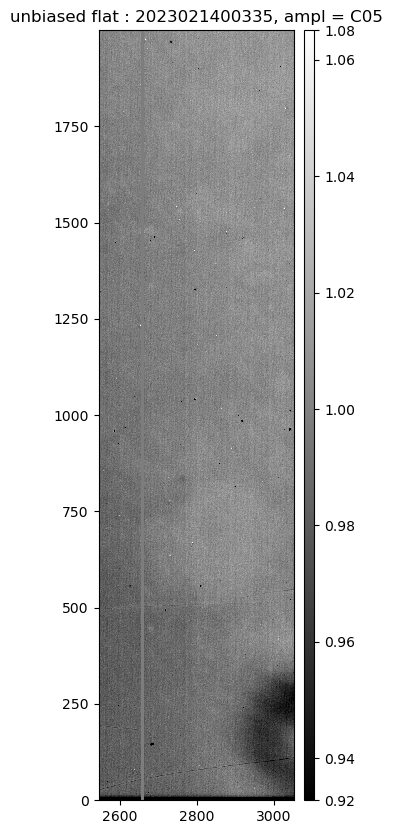

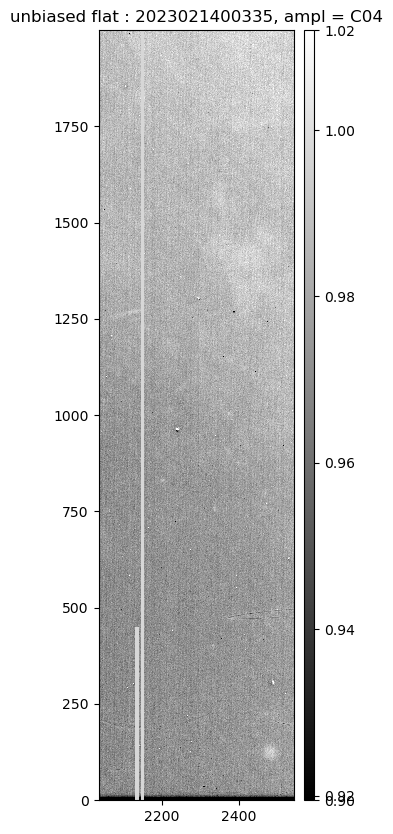

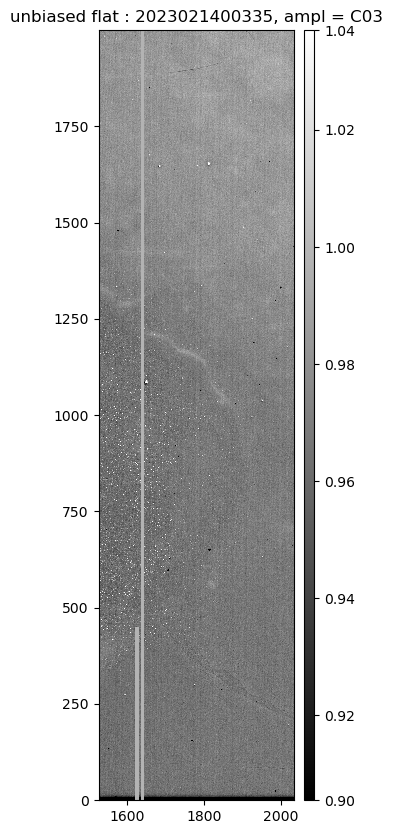

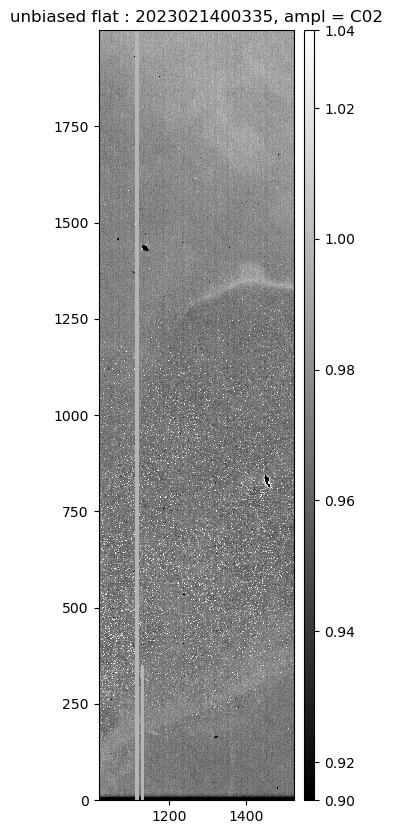

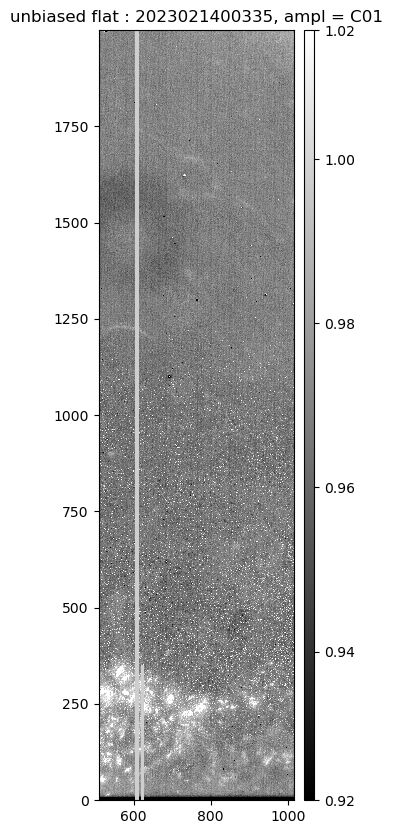

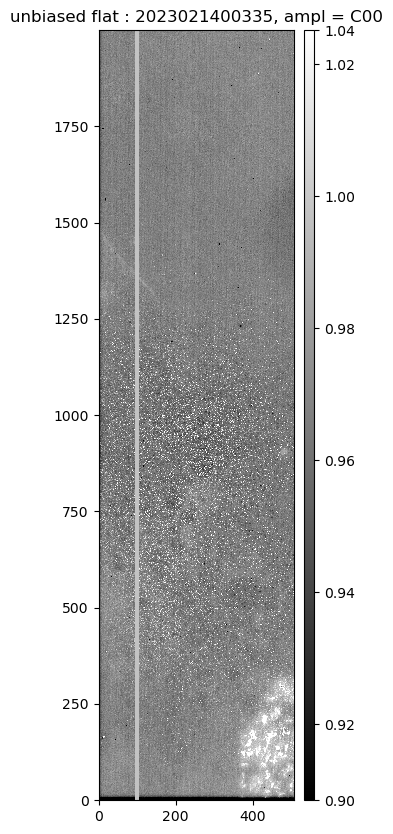

In [44]:
all_img = []
all_nameimg = []

for ampIdx, amp in enumerate(flat_img.getDetector()):
    ampName = amp.getName()
    all_nameimg.append(ampName)
    
    # This can work only on postISRCCD
    ampExp = flat_img.Factory(flat_img, amp.getBBox())
    all_img.append(ampExp.image) 
    fig = plt.figure(figsize=(5,10))
    afw_display = afwDisplay.Display(frame=fig)
    afw_display.scale('linear', 'zscale',None)
    title = f"unbiased flat : {exposure_selected}, ampl = {ampName}"
    afw_display.mtv(ampExp.image,title=title)

In [62]:
mapampid = [0,1,2,3,4,5,6,7,15,14,13,12,11,10,9,8]

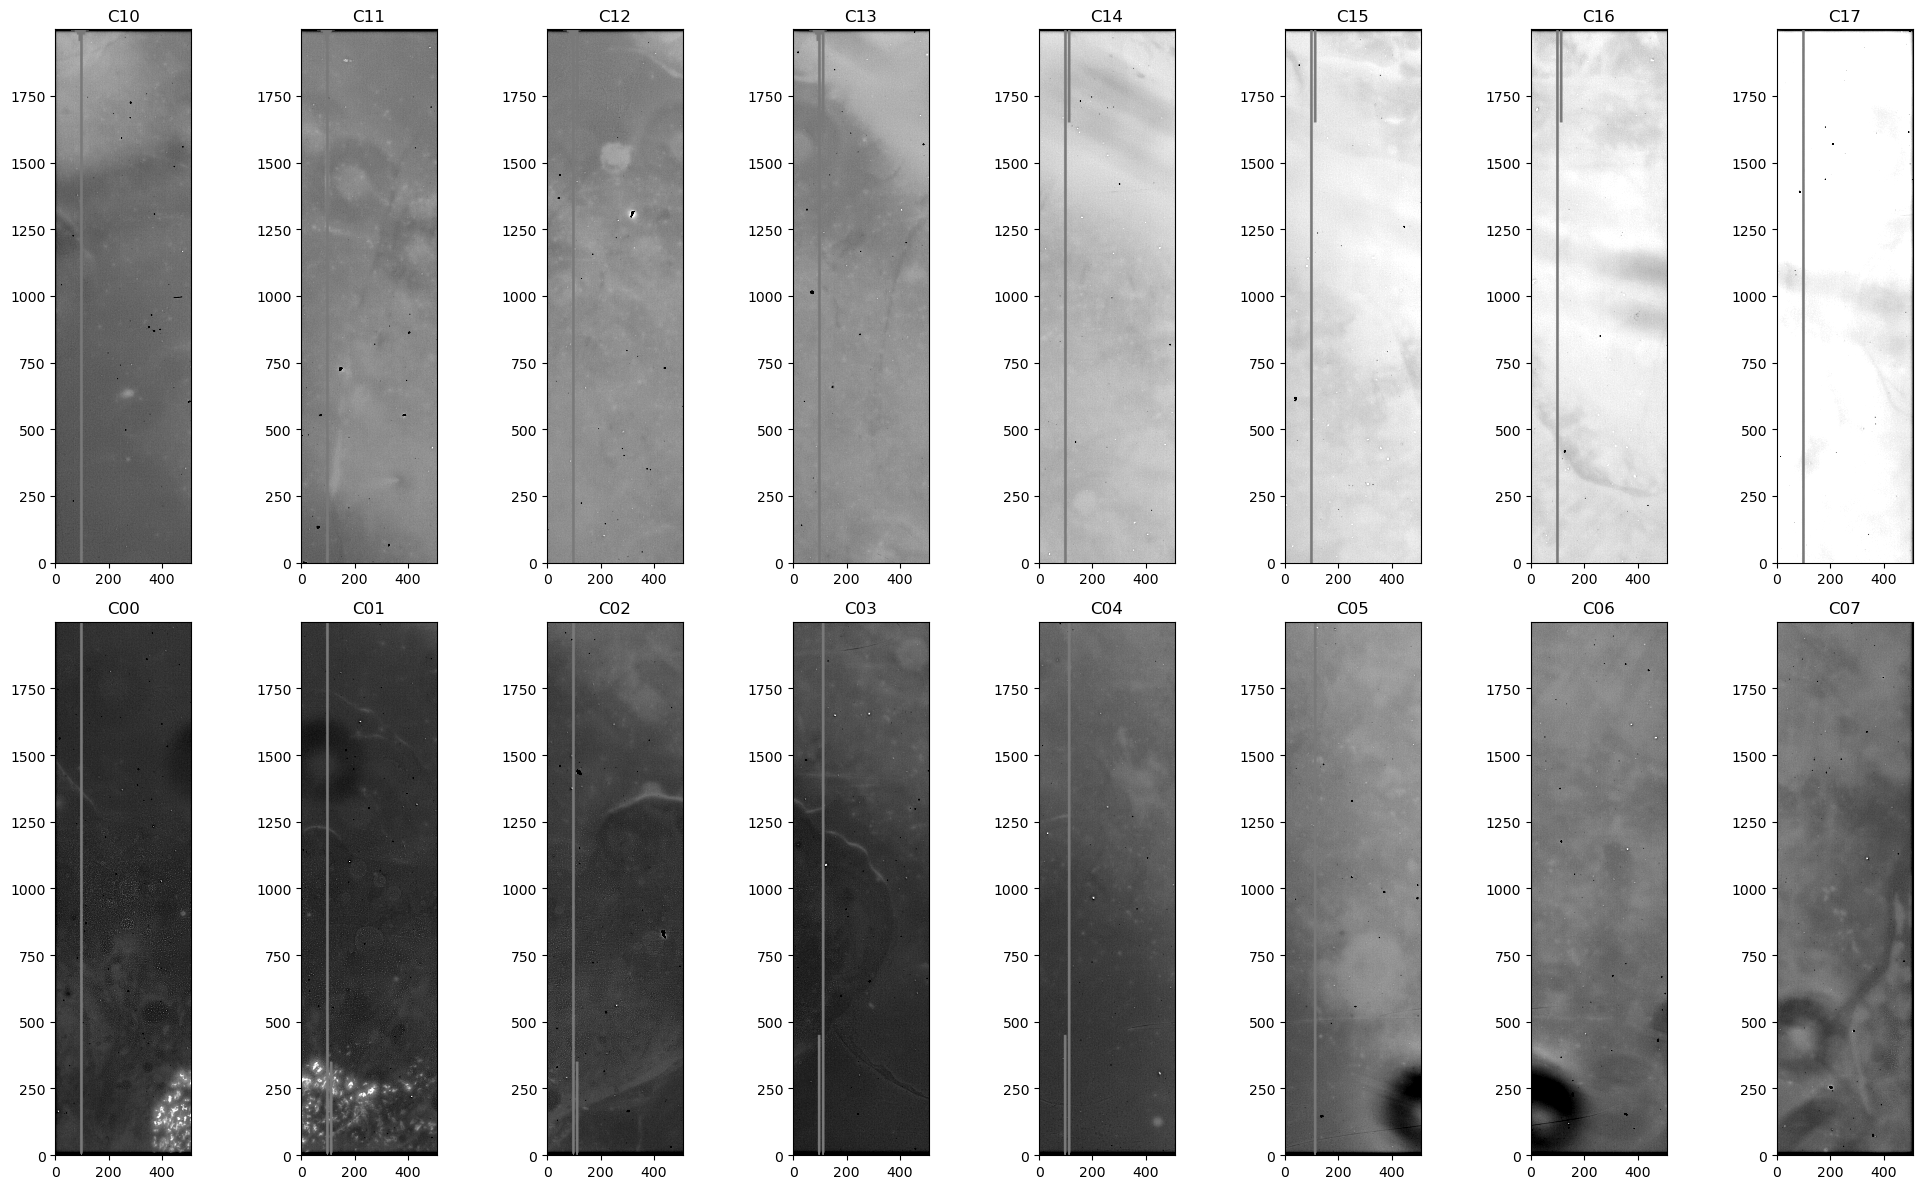

In [63]:
fig=plt.figure(figsize=(20,12))

for idx in range(16):
    ax=fig.add_subplot(2,8,mapampid[idx]+1)
    ax.imshow(all_img[idx].getArray(),origin='lower',vmin=0.95,vmax=1.05,cmap="gray")
    ax.set_title(all_nameimg[idx])
plt.tight_layout()

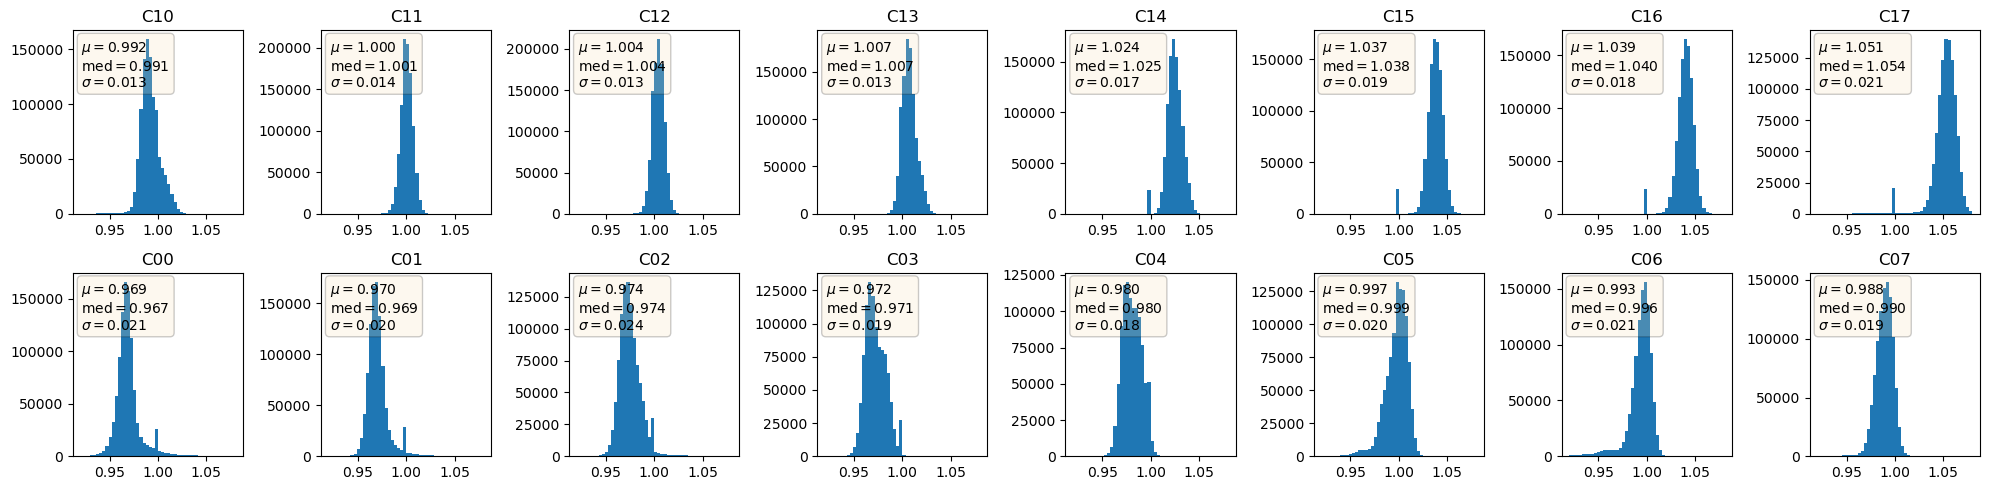

In [69]:
fig=plt.figure(figsize=(20,5))

for idx in range(16):
    ax=fig.add_subplot(2,8,mapampid[idx]+1)
    ax.hist(all_img[idx].getArray().flatten(),bins=50,range=(0.92,1.08))
    x = all_img[idx].getArray().flatten()

    mu = x.mean()
    median = np.median(x)
    sigma = x.std()
    textstr = '\n'.join((
    r'$\mu=%.3f$' % (mu, ),
    r'$\mathrm{med}=%.3f$' % (median, ),
    r'$\sigma=%.3f$' % (sigma, )))

    ax.set_title(all_nameimg[idx])  
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)

    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,verticalalignment='top', bbox=props)
    
 
plt.tight_layout()